In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import os


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
os.getcwd()

'C:\\Users\\Daniel Beck\\Documents\\University\\AAA_ESADE\\CloudComputing\\PandasNotebooks\\PandasSession1'

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rnames,  engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=mnames,  engine='python')
data = pd.merge(pd.merge(ratings, users), movies)

In [4]:
df = pd.DataFrame(data)
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [5]:
df.duplicated().sum()

0

In [6]:
print(df.shape)

# unique values
movies = set(df.title)
len(movies)


#duplicates
duplicates = 1000209 - len(movies)
print( f'the number of duplicates is: {duplicates}')
print( f'the number of unique movies is: {len(movies)}')

(1000209, 10)
the number of duplicates is: 996503
the number of unique movies is: 3706


In [7]:
# mean rating
mean = df["rating"].mean()
std = df["rating"].std()

print( f'the mean rating is: {mean:.3f}')
print( f'the std of ratings is: {std:.3f}')

the mean rating is: 3.582
the std of ratings is: 1.117


In [8]:
# delete the NaN of the movies
df.isnull().sum()
df.dropna()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [9]:
# how many ratings does Cookoo movie have?
movie = len(df[df["title"]=="One Flew Over the Cuckoo's Nest (1975)"])
movie

1725

In [10]:
# what is the average rating of women for this film?
cuckoo = df[df["title"]=="One Flew Over the Cuckoo's Nest (1975)"]

women_rating = cuckoo.pivot_table("rating", columns = "gender", aggfunc="mean" )
women_rating

gender,F,M
rating,4.310811,4.418423


In [11]:
diff = abs(women_rating["F"]-women_rating["M"])
diff

rating    0.107612
dtype: float64

In [12]:
# ttest if men and women rate differently
men_rating = cuckoo[cuckoo["gender"]=="M"]["rating"]
women_rating = cuckoo[cuckoo["gender"]=="F"]["rating"]


from scipy.stats import ttest_ind
ttest_ind(women_rating, men_rating)

Ttest_indResult(statistic=-2.478649384828993, pvalue=0.013283197869991386)

In [13]:
# remove duplicates
duplicates = df.duplicated()
duplicates.shape
df.drop_duplicates()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [14]:
# get a column with years
df["year"] = df['title'].str.strip().str[-6:].str.strip().str[1:5]
# yearly = df.pivot_table("genres", "year", aggfunc="count")

In [15]:
genres = df["genres"].str.split("|", expand=True)
genres.head()

,0,1,2,3,4,5
0,Drama,None,None,None,None,None
1,Drama,None,None,None,None,None
2,Drama,None,None,None,None,None
3,Drama,None,None,None,None,None
4,Drama,None,None,None,None,None


In [16]:
df1 = pd.concat([df, genres], axis=1)
df1.columns = [*df.columns, "genre1", "genre2", "genre3", "genre4", "genre5", "genre6"]
df1.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,genre1,genre2,genre3,genre4,genre5,genre6
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None


In [17]:
# How many movies have Sci-Fi as Genre1
print(set(df1["genre1"]))


scifi = df1[df1["genre1"]=="Sci-Fi"]
print(len(scifi["genre1"]))

{'Sci-Fi', 'Fantasy', 'Crime', 'Western', 'Horror', 'Drama', 'Film-Noir', 'Comedy', "Children's", 'Animation', 'Adventure', 'Thriller', 'Mystery', 'War', 'Musical', 'Action', 'Romance', 'Documentary'}
11464


In [18]:
# How many have Sci-Fi in any Genre?
any_scifi = df1[df1["genres"].str.match('Sci-Fi')]
any_scifi = pd.DataFrame(any_scifi.pivot_table("title", "year", aggfunc="count").to_records())
years = pd.DataFrame(df1.pivot_table("title", "year", aggfunc="count").to_records())
any_scifi.columns = ["year", "titles_scifi"]

years1 = pd.merge(left=years, right=any_scifi, on="year", how="outer").dropna()
years1["%"] = years1["titles_scifi"]/years1["title"]
max_scifi = years1[years1["%"] == years1["%"].max()]
max_scifi

,year,title,titles_scifi,%
6,1926,472,388.0,0.822034


In [19]:
# build a linear regression to understand what impacts movie_ratings

df1.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,genre1,genre2,genre3,genre4,genre5,genre6
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975,Drama,None,None,None,None,None


In [20]:
#drop unnecessary columns 
reg = df1.drop(["genres", "movie_id", "user_id", "title", "timestamp", "zip"], axis=1)


#get dummies for gender
cats = {'M':1, 'F':0}
reg['gender'] = reg['gender'].apply(lambda x: cats[x])

#get dummies for the categorical/object variables - 
print(reg.dtypes)
reg = pd.get_dummies(reg)

rating         int64
gender         int64
age            int64
occupation     int64
year          object
genre1        object
genre2        object
genre3        object
genre4        object
genre5        object
genre6        object
dtype: object


In [21]:
reg.head()

,rating,gender,age,occupation,year_1919,year_1920,year_1921,year_1922,year_1923,year_1925,year_1926,year_1927,year_1928,year_1929,year_1930,year_1931,year_1932,year_1933,year_1934,year_1935,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1942,year_1943,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,genre1_Action,genre1_Adventure,genre1_Animation,genre1_Children's,genre1_Comedy,genre1_Crime,genre1_Documentary,genre1_Drama,genre1_Fantasy,genre1_Film-Noir,genre1_Horror,genre1_Musical,genre1_Mystery,genre1_Romance,genre1_Sci-Fi,genre1_Thriller,genre1_War,genre1_Western,genre2_Adventure,genre2_Animation,genre2_Children's,genre2_Comedy,genre2_Crime,genre2_Documentary,genre2_Drama,genre2_Fantasy,genre2_Film-Noir,genre2_Horror,genre2_Musical,genre2_Mystery,genre2_Romance,genre2_Sci-Fi,genre2_Thriller,genre2_War,genre2_Western,genre3_Animation,genre3_Children's,genre3_Comedy,genre3_Crime,genre3_Drama,genre3_Fantasy,genre3_Film-Noir,genre3_Horror,genre3_Musical,genre3_Mystery,genre3_Romance,genre3_Sci-Fi,genre3_Thriller,genre3_War,genre3_Western,genre4_Children's,genre4_Comedy,genre4_Crime,genre4_Drama,genre4_Fantasy,genre4_Horror,genre4_Musical,genre4_Mystery,genre4_Romance,genre4_Sci-Fi,genre4_Thriller,genre4_War,genre4_Western,genre5_Fantasy,genre5_Musical,genre5_Romance,genre5_Sci-Fi,genre5_Thriller,genre5_War,genre6_War
0,5,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,56,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1,25,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,25,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
y = reg.iloc[:,:1].values
X = reg.iloc[:,1:].values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

#set a seed for reproducability
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=1/3,random_state=0)
model = LinearRegression().fit(x_train, y_train)

model.score(x_train, y_train)

0.07867939701301208

In [ ]:
preds = pd.DataFrame(model.predict(x_train))
actual = pd.DataFrame(y)

test = pd.concat([preds, actual], axis=1)
test.columns = ["pred", "actual"]
test.head()

# https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

In [23]:
df.head()
male = df[df["gender"]=="M"][["rating"]]
female = df[df["gender"]=="F"]



,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,1975


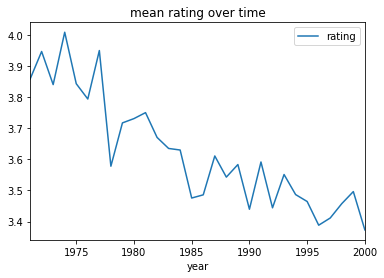

In [26]:
# plot the mean rating for each year on a barchart
df.head()
meanplot = df.pivot_table("rating", "year", aggfunc="mean")

# test = df[df["title"]=="'burbs, The (1989)"]["rating"].mean()
# test

meanplot = pd.DataFrame(meanplot.to_records())
meanplot["year"] = [int(i) for i in meanplot["year"]]
meanplot[meanplot["year"]>1970].plot(x="year", y="rating", kind="line", title="mean rating over time")

ValueError: name already used as a name or title

ValueError: x and y must be the same size

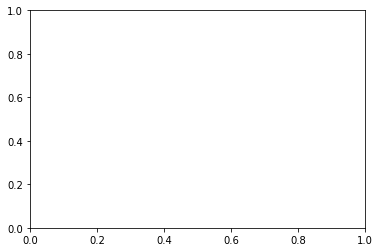

In [26]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Rating Prediction")
plt.xlabel("Independent Var")
plt.ylabel("Rating")
plt.show()